<center>
<img src="../images/ods_stickers.jpg" />
    
# Introducción al Machine Learning 2020

Basado en material de Pattern Classsification Duda, Hart, Stork. Traducido y editado al español por [Ana Georgina Flesia](https://www.linkedin.com/in/georginaflesia/). Este material esta sujeto a los términos y condiciones de la licencia  [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Se permite el uso irrestricto para todo propósito no comercial.Copyright (c) 2019 [Georgina Flesia](georgina.flesia@unc.edu.ar)


In [1]:
from matplotlib import style 
style.use('seaborn-dark')

# IntML2020 - Clasificación sobre Winsconsin breast cancer dataset - SVM

# Ejercicio 1:

* a) Revise  la seccion 5.8.5 del libro de Duda et al sobre metodos de aproximacion estocastica y el algoritmo LMS para tener una idea general de los algoritmos de Stochastic Gradient >Descent que lideran la resolucion de linear SVM y Neural Networks.


* b)Sobre el grupo de datos sobre cancer de mama, aplique Linear SVM usando  Stochastic gradient descent, Perceptron y estrategias Passive Agressive,   separando en 80% train y 20% test cinco veces. Arme las matrices de confusion y curvas ROC y discuta los resultados haciendo énfasis en la diferencia entre los solvers. Use el siguiente codigo para ayudarse. 

Attribute Information:

ID number 2) Diagnosis (M = malignant, B = benign) 3–32)
Ten real-valued features are computed for each cell nucleus:

* radius (mean of distances from center to points on the perimeter)
* texture (standard deviation of gray-scale values)
* perimeter
* area
* smoothness (local variation in radius lengths)
* compactness (perimeter² / area — 1.0)
* concavity (severity of concave portions of the contour)
* concave points (number of concave portions of the contour)
* symmetry
* fractal dimension (“coastline approximation” — 1)

The mean, standard error and “worst” or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#importing the dataset 
df = pd.read_csv('../data/data_breast_cancer.csv')
dataset = df.drop(['Unnamed: 32'], axis=1)
X = dataset.iloc[:, 2:32].values
Y = dataset.iloc[:, 1].values

dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
dataframe = pd.DataFrame(Y)
#Encoding categorical data values 
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y1 = labelencoder_Y.fit_transform(Y)

In [4]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)


In [5]:
#Load classifiers 
from sklearn.linear_model import SGDClassifier, Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression

classifiers = [
    ("SGD", SGDClassifier(max_iter=100, tol=1e-3)),# SGDClassifier (soft-margin) linear Support Vector Machine,
    ("ASGD", SGDClassifier(average=True, max_iter=1000, tol=1e-3)),# SGDClassifier (soft-margin) linear Support Vector Machine with averaged weights,
    ("Perceptron", Perceptron(tol=1e-3)),
    ("Passive-Aggressive I", PassiveAggressiveClassifier(loss='hinge',
                                                         C=1.0, tol=1e-4)),
    ("Passive-Aggressive II", PassiveAggressiveClassifier(loss='squared_hinge',
                                                          C=1.0, tol=1e-4)),
    ("SAG", LogisticRegression(solver='sag', tol=1e-1, C=1.e4 / X.shape[0],
                               multi_class='auto'))
]

training SGD
training ASGD
training Perceptron
training Passive-Aggressive I
training Passive-Aggressive II
training SAG


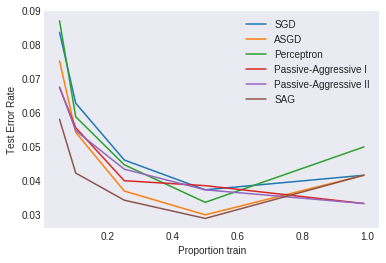

In [6]:
# Splitting the dataset into the Training set and Test set to study the solvers 
from sklearn.model_selection import train_test_split

heldout = [0.95, 0.90, 0.75, 0.50, 0.01]
rounds = 20
xx = 1. - np.array(heldout)

for name, clf in classifiers:
    print("training %s" % name)
    rng = np.random.RandomState(42)
    yy = []
    for i in heldout:
        yy_ = []
        for r in range(rounds):
            X_train, X_test, y_train, y_test = \
                train_test_split(X, Y1, test_size=i, random_state=rng)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            yy_.append(1 - np.mean(y_pred == y_test))
        yy.append(np.mean(yy_))
    plt.plot(xx, yy, label=name)

plt.legend(loc="upper right")
plt.xlabel("Proportion train")
plt.ylabel("Test Error Rate")
plt.show()

In [7]:
# Splitting the dataset into the Training set and Test set to return ROC and confusion matrices
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y1, test_size = 0.25, random_state = 0)

In [8]:
def plot_confusion_matrix(y_true, y_pred, classes,ax=None,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    if ax is None:
        ax = plt.gca()

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        ax.set_title("Normalized confusion matrix")
    #else:
        ax.set_title('Confusion matrix, without normalization')
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
#     plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
#              rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    return ax



In [9]:
def plot_roc_curve(fp_rate,tp_rate,name,zoom,ax):
    if zoom:        
        plt.xlim(0, 0.2)
        plt.ylim(0.8, 1)
        ax.set_title('ROC curve (zoomed in at top left)')
    else:
        ax.set_title('ROC curve')
    ax.plot([0, 1], [0, 1], 'k--')
    ax.plot(fp_rate, tp_rate, label=name)
    ax.set_xlabel('False positive rate')
    ax.set_ylabel('True positive rate')
    ax.legend(loc='best')


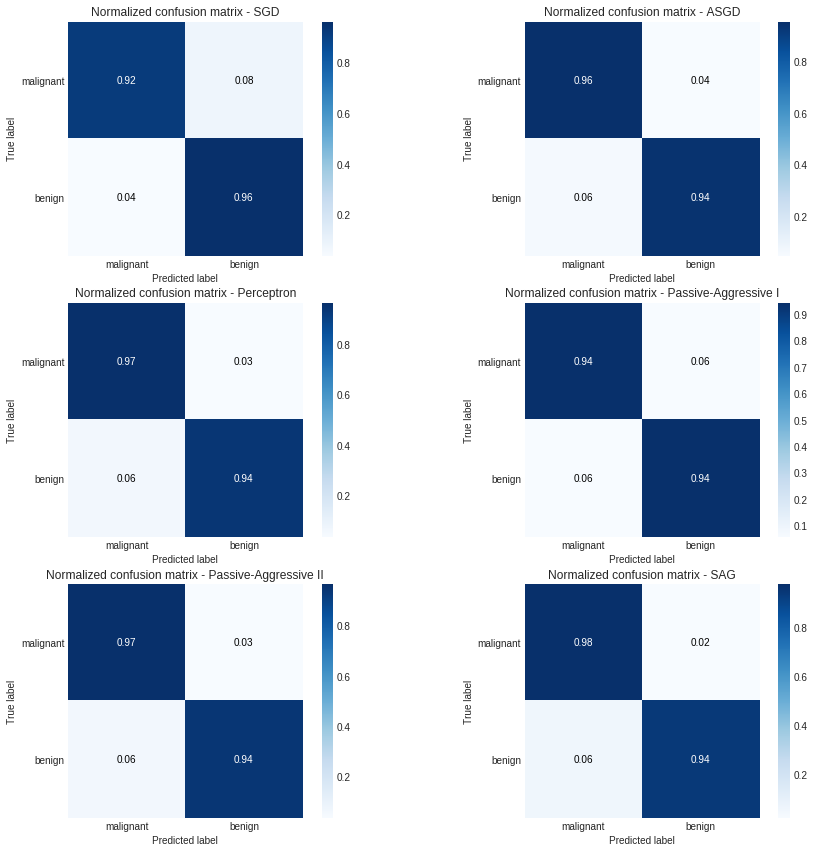

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.utils.multiclass import unique_labels
y_labels = np.array(['malignant', 'benign'])

#classes = Y_labels[unique_labels(Y_test, Y_pred)]

# iterate over classifiers
scores=[]
plt.figure(figsize=(15,25))
for k,(name, clf) in enumerate(classifiers):
    clf.fit(X_train, y_train)
    scores.append((name,clf.score(X_test, y_test),clf.score(X_train,y_train)))
    y_pred = clf.predict(X_test)
    np.set_printoptions(precision=2)
    # Plot normalized confusion matrix
    plt.subplot(5,2,k+1)    
    plot_confusion_matrix(y_test, y_pred,
                          classes=y_labels,
                          normalize=True,
                          title='Normalized confusion matrix - {}'.format(name))
    # Plot non-normalized confusion matrix
    #plot_confusion_matrix(Y_test, Y_pred, classes=Y,title='Confusion matrix, without normalization')



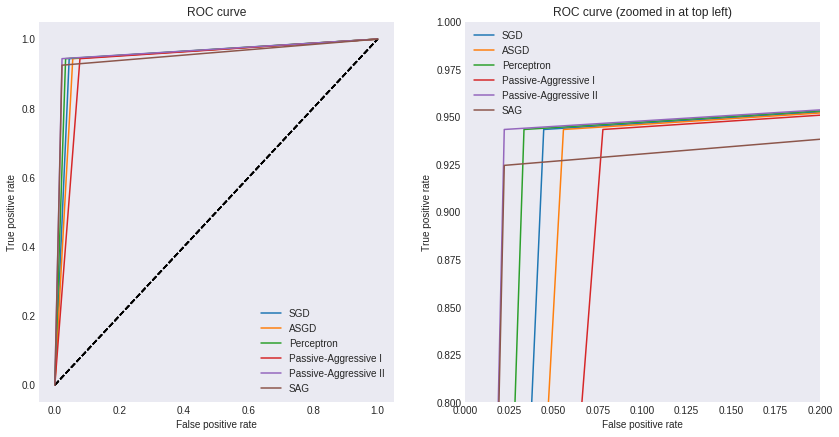

In [11]:
lst = []
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(14,7))
for name,clf in classifiers:
    clf.fit(X_train, y_train)
    lst.append(clf.score(X_test, y_test))
    y_pred = clf.predict(X_test)
    fp_rate, tp_rate, _ = roc_curve(y_test, y_pred)
    plot_roc_curve(fp_rate,tp_rate,name,zoom=False,ax=ax1)
    plot_roc_curve(fp_rate,tp_rate,name,zoom=True,ax=ax2)

In [12]:
#errors
from prettytable import PrettyTable
    
table = PrettyTable()

table.field_names = ["Model", "Test Score", "Train Score"]
for name,test_score,train_score in scores:
    table.add_row([name,test_score,train_score])
table.sortby = "Test Score"
table.reversesort = True
print(table)

+-----------------------+--------------------+--------------------+
|         Model         |     Test Score     |    Train Score     |
+-----------------------+--------------------+--------------------+
|          SAG          | 0.965034965034965  | 0.9812206572769953 |
|       Perceptron      | 0.958041958041958  | 0.9882629107981221 |
| Passive-Aggressive II | 0.958041958041958  | 0.9765258215962441 |
|          ASGD         | 0.951048951048951  | 0.9882629107981221 |
|  Passive-Aggressive I | 0.9440559440559441 | 0.9577464788732394 |
|          SGD          | 0.9370629370629371 | 0.9812206572769953 |
+-----------------------+--------------------+--------------------+


## Respuesta

<span style="color:red"> RESPONDA EL INCISO  (b) AQUÍ </span>

Algo bueno de las metricas usadas, tanto la curva ROC como la matriz de confusión, es que nos proveen una visión mas amplia de cómo está clasificando el algoritmo mas allá del Accuracy.   
En este grupo de datos en particular, siendo un grupo de cancer de mama, está muy bien poder ver las sutilezas de los errores ya que no dan iguales los falsos positivos que los falsos negativos. En caso de un falso positivo, es malo pues uno genera stress en el paciente innecesariamente pero los falsos negativos en mi opinion son más graves, pues estamos fallando en diagnosticar una enfermedad.  
En ese sentido es muy interesante ver cómo se comportan nuestros modelos teniendo eso en cuenta.  
### Modelos entrenados: 
- SDG
- ASDG
- Perceptron
- Passive-Aggressive I
- Passige-Aggressive II
- SAG

Algo que primero podemos notar es que ninguno de los modelos alcanza 100% de accuracy en train, y que si bien en datos de test se comportan bien, nunca mejor que en train. Como los resultados son bastante buenos, no podemos asegurar tener un problema ahí, pero si hubiese mayor diferencia entre train y test podríamos estar teniendo un problema de falta de capacidad de generalización por parte del modelo.  


### Mejor modelo

En cuanto a score, el mejor modelo es **SAG (Regresión logística)**. Analizando la curva ROC observamos que es el que alcanza mayor ratio de True Positives y además mantiene muy cercano a 0 el ratio de False Positives. De todas formas, una de las mejores propiedades de este modelo, segun la matriz de confusión, es que tiene el mejor score detectando efectivamente tumores malignos. Observamos solamente un 0.02 de casos en los cuales el tumor es maligno y se lo clasificó como benigno.  
Observando ROC, matriz de confusión y score, el siguiente mejor modelo sería perceptron. En la curva ROC se aprecia claramente que si bien comete muchos mas falsos positivos, mantiene muy bien el ratio de true positives, y nuevamente con la matriz de confusión podemos observar que es el siguiente mejor en cuanto a deteccion de tumores malignos

# Ejercicio 2: 

Estudie el espacio de parámetros de los kernel SVM, usando RBG, sigmoid y polinomial kernels con los datos de cancer de mama. Use el siguiente codigo como ejemplo (corresponde a RGB SVM).

The best parameters are {'C': 1.0, 'gamma': 0.1} with a score of 0.97


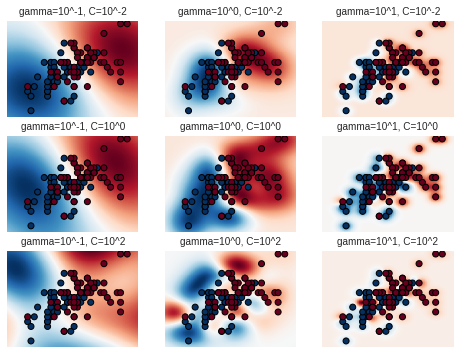

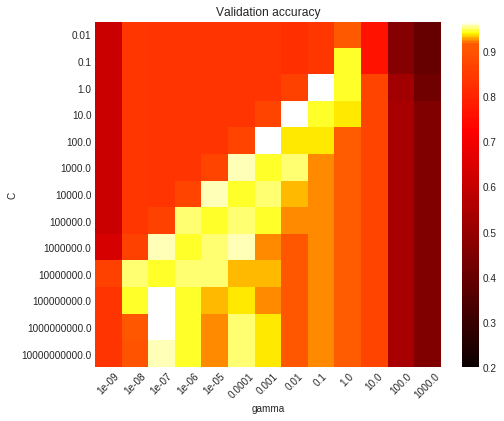

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV


# Utility function to move the midpoint of a colormap to be around
# the values of interest.

class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

# #############################################################################
# Load and prepare data set
#
# dataset for grid search

iris = load_iris()
X = iris.data
y = iris.target

# Dataset for decision function visualization: we only keep the first two
# features in X and sub-sample the dataset to keep only 2 classes and
# make it a binary classification problem.

X_2d = X[:, :2]
X_2d = X_2d[y > 0]
y_2d = y[y > 0]
y_2d -= 1

# It is usually a good idea to scale the data for SVM training.
# We are cheating a bit in this example in scaling all of the data,
# instead of fitting the transformation on the training set and
# just applying it on the test set.

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_2d = scaler.fit_transform(X_2d)

# #############################################################################
# Train classifiers
#
# For an initial search, a logarithmic grid with basis
# 10 is often helpful. Using a basis of 2, a finer
# tuning can be achieved but at a much higher cost.

C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(X, y)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

# Now we need to fit a classifier for all parameters in the 2d version
# (we use a smaller set of parameters here because it takes a while to train)

C_2d_range = [1e-2, 1, 1e2]
gamma_2d_range = [1e-1, 1, 1e1]
classifiers = []
for C in C_2d_range:
    for gamma in gamma_2d_range:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(X_2d, y_2d)
        classifiers.append((C, gamma, clf))

# #############################################################################
# Visualization
#
# draw visualization of parameter effects

plt.figure(figsize=(8, 6))
xx, yy = np.meshgrid(np.linspace(-3, 3, 200), np.linspace(-3, 3, 200))
for (k, (C, gamma, clf)) in enumerate(classifiers):
    # evaluate decision function in a grid
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # visualize decision function for these parameters
    plt.subplot(len(C_2d_range), len(gamma_2d_range), k + 1)
    plt.title("gamma=10^%d, C=10^%d" % (np.log10(gamma), np.log10(C)),
              size='medium')

    # visualize parameter's effect on decision function
    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_2d, cmap=plt.cm.RdBu_r,
                edgecolors='k')
    plt.xticks(())
    plt.yticks(())
    plt.axis('tight')

scores = grid.cv_results_['mean_test_score'].reshape(len(C_range),
                                                     len(gamma_range))

# Draw heatmap of the validation accuracy as a function of gamma and C
#
# The score are encoded as colors with the hot colormap which varies from dark
# red to bright yellow. As the most interesting scores are all located in the
# 0.92 to 0.97 range we use a custom normalizer to set the mid-point to 0.92 so
# as to make it easier to visualize the small variations of score values in the
# interesting range while not brutally collapsing all the low score values to
# the same color.

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
           norm=MidpointNormalize(vmin=0.2, midpoint=0.92))
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Validation accuracy')
plt.show()

## Respuesta 

<span style="color:red"> RESPONDA EL INCISO  (a) AQUÍ </span>

In [14]:
# Load and prepare data set
#
# dataset for grid search
df = pd.read_csv('../data/data_breast_cancer.csv')
dataset = df.drop(['Unnamed: 32'], axis=1)

X = dataset.iloc[:, 2:32].values
Y = dataset.iloc[:, 1].values

dataframe = pd.DataFrame(Y)

#Encoding categorical data values 
labelencoder_Y = LabelEncoder()
y = labelencoder_Y.fit_transform(Y)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

# Dataset for decision function visualization: we will
# run PCA and keep the 2 principal components
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
X_2d = pca.transform(X)

# It is usually a good idea to scale the data for SVM training.
# We are cheating a bit in this example in scaling all of the data,
# instead of fitting the transformation on the training set and
# just applying it on the test set.

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_2d = scaler.fit_transform(X_2d)


The best parameters are {'C': 10.0, 'gamma': 0.01} with a score of 0.98


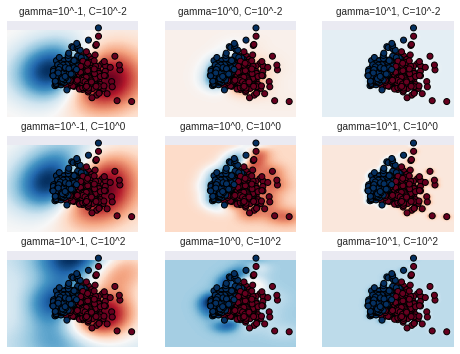

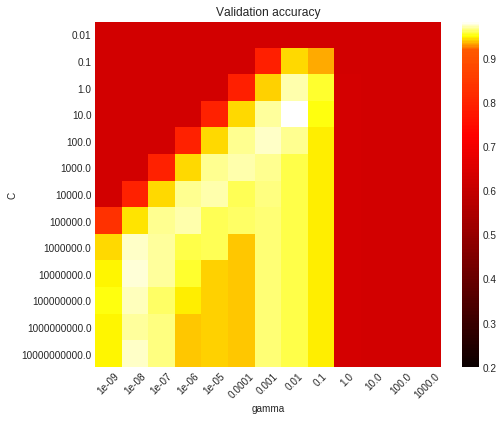

In [15]:
# #############################################################################
# Train classifiers
#
# For an initial search, a logarithmic grid with basis
# 10 is often helpful. Using a basis of 2, a finer
# tuning can be achieved but at a much higher cost.

C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(X, y)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

# Now we need to fit a classifier for all parameters in the 2d version
# (we use a smaller set of parameters here because it takes a while to train)

C_2d_range = [1e-2, 1, 1e2]
gamma_2d_range = [1e-1, 1, 1e1]
classifiers = []
for C in C_2d_range:
    for gamma in gamma_2d_range:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(X_2d, y)
        classifiers.append((C, gamma, clf))

# #############################################################################
# Visualization
#
# draw visualization of parameter effects

plt.figure(figsize=(8, 6))
xx, yy = np.meshgrid(np.linspace(-5, 5, 200), np.linspace(-5, 5, 200))
for (k, (C, gamma, clf)) in enumerate(classifiers):
    # evaluate decision function in a grid
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # visualize decision function for these parameters
    plt.subplot(len(C_2d_range), len(gamma_2d_range), k + 1)
    plt.title("gamma=10^%d, C=10^%d" % (np.log10(gamma), np.log10(C)),
              size='medium')

    # visualize parameter's effect on decision function
    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap=plt.cm.RdBu_r,
                edgecolors='k')
    plt.xticks(())
    plt.yticks(())
    plt.axis('tight')

scores = grid.cv_results_['mean_test_score'].reshape(len(C_range),
                                                     len(gamma_range))

# Draw heatmap of the validation accuracy as a function of gamma and C
#
# The score are encoded as colors with the hot colormap which varies from dark
# red to bright yellow. As the most interesting scores are all located in the
# 0.92 to 0.97 range we use a custom normalizer to set the mid-point to 0.92 so
# as to make it easier to visualize the small variations of score values in the
# interesting range while not brutally collapsing all the low score values to
# the same color.

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
           norm=MidpointNormalize(vmin=0.2, midpoint=0.92))
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Validation accuracy')
plt.show()

# Ejercicio 3: 

Compare diferentes  SVM sobre los datos de cancer de mama. Use los parámetros que estudio en el ejemplo anterior. 

## Respuesta

<span style="color:red"> RESPONDA EL INCISO  (a) AQUÍ </span>

In [16]:
# Load and prepare data set
#
# dataset for grid search
df = pd.read_csv('../data/data_breast_cancer.csv')
dataset = df.drop(['Unnamed: 32'], axis=1)

X = dataset.iloc[:, 2:32].values
Y = dataset.iloc[:, 1].values

dataframe = pd.DataFrame(Y)

#Encoding categorical data values 
labelencoder_Y = LabelEncoder()
y = labelencoder_Y.fit_transform(Y)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

# Dataset for decision function visualization: we will
# run PCA and keep the 2 principal components
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
X_2d = pca.transform(X)

# It is usually a good idea to scale the data for SVM training.
# We are cheating a bit in this example in scaling all of the data,
# instead of fitting the transformation on the training set and
# just applying it on the test set.

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_2d = scaler.fit_transform(X_2d)


In [17]:
from sklearn import svm
models = (('linear',svm.SVC(kernel='linear')),
          ('rbf',svm.SVC(kernel='rbf')),
          ('poly',svm.SVC(kernel='poly',degree=3)))

C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)


cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

for name, svc in models:
    grid = GridSearchCV(svc, param_grid=param_grid, cv=cv)
    grid.fit(X, y)

    print("The best parameters for {} kernel are {} with a score of {:.2f}".format(
        name, grid.best_params_, grid.best_score_))

The best parameters for linear kernel are {'C': 0.1, 'gamma': 1e-09} with a score of 0.97
The best parameters for rbf kernel are {'C': 10.0, 'gamma': 0.01} with a score of 0.98
The best parameters for poly kernel are {'C': 1.0, 'gamma': 0.1} with a score of 0.96


/home/lucia/anaconda3/envs/intro-aprendizaje/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


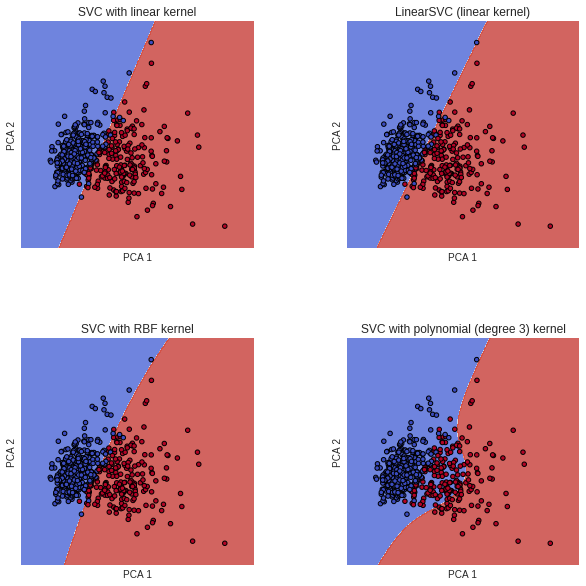

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters  
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

X = X_2d

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
models = (svm.SVC(kernel='linear',C= 0.1, gamma= 1e-09),
          svm.LinearSVC(C=C, max_iter=10000),
          svm.SVC(kernel='rbf', C = 10.0, gamma= 0.01),
          svm.SVC(kernel='poly',C = 1.0, gamma= 0.1))
models_fit = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2,figsize=(10,10))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X_2d[:, 0], X_2d[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models_fit, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('PCA 1')
    ax.set_ylabel('PCA 2')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

## Seleccion del modelo 
El ejemplo anterior fue sólo para visualizar los diferentes resultados de SVM pero no aporta demasiado para entender y seleccionar algun modelo. Además, clasificamos los datos haciendo un analisis de componentes principales, y no utilizamos todos los datos.
Utilizamos el mismo C y el mismo gamma para distintos kernels cuando en realidad lo que debemos hacer es buscar el C y el Gamma optimo para cada uno de los diferentes Kernels. Vamos a hacer eso ahora, utilizando todas las dimensiones del dataset y métricas como la curva ROC y matrices de confusión. 

In [19]:
classifiers = [
    ("Linear", svm.SVC(kernel='linear',C= 0.1, gamma= 1e-09)),
    ("Poly", svm.SVC(kernel='poly', degree=3, C= 1.0, gamma= 0.1)),
    ("RBF", svm.SVC(kernel='rbf', C= 10.0, gamma= 0.01)),
    ("Sigmoid", svm.SVC(kernel='sigmoid', C= 10.0, gamma= 0.01)),
]

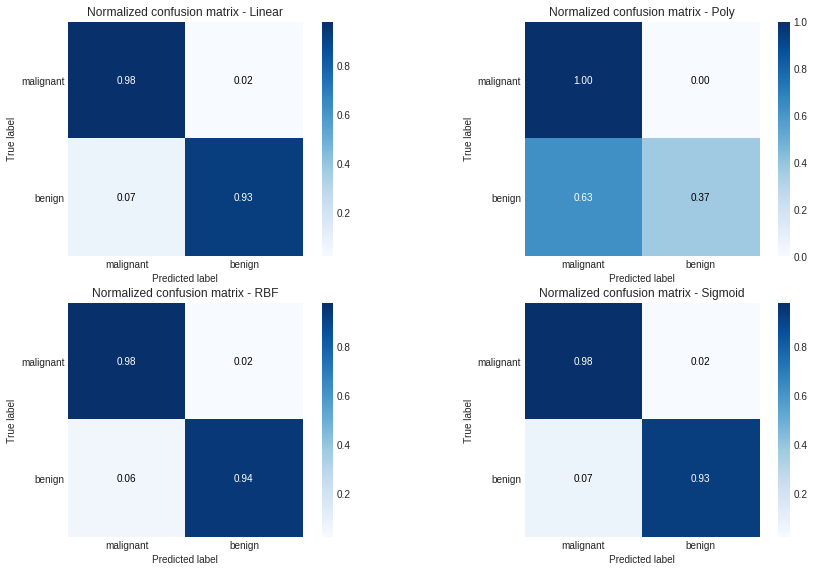

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.utils.multiclass import unique_labels
y_labels = np.array(['malignant', 'benign'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
#classes = Y_labels[unique_labels(Y_test, Y_pred)]

# iterate over classifiers
scores=[]
plt.figure(figsize=(15,25))
for k,(name, clf) in enumerate(classifiers):
    clf.fit(X_train, y_train)
    scores.append((name,clf.score(X_test, y_test),clf.score(X_train,y_train)))
    y_pred = clf.predict(X_test)
    np.set_printoptions(precision=2)
    # Plot normalized confusion matrix
    plt.subplot(5,2,k+1)    
    plot_confusion_matrix(y_test, y_pred,
                          classes=y_labels,
                          normalize=True,
                          title='Normalized confusion matrix - {}'.format(name))
    # Plot non-normalized confusion matrix
    #plot_confusion_matrix(Y_test, Y_pred, classes=Y,title='Confusion matrix, without normalization')



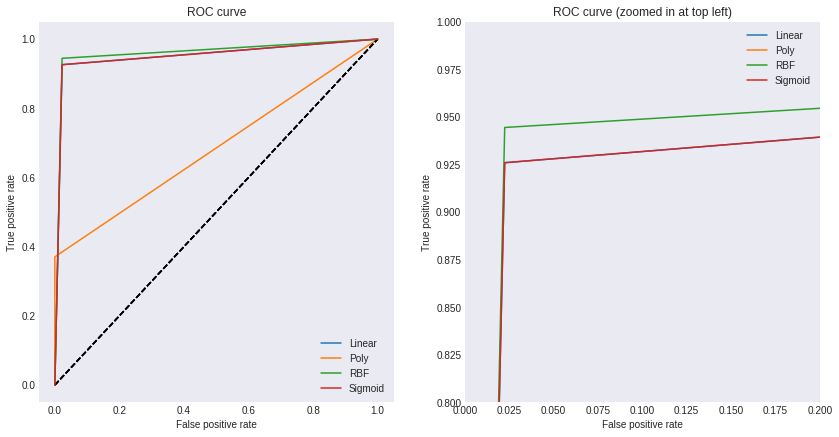

In [21]:

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(14,7))
for name,clf in classifiers:
    clf.fit(X_train, y_train)
    lst.append(clf.score(X_test, y_test))
    y_pred = clf.predict(X_test)
    fp_rate, tp_rate, _ = roc_curve(y_test, y_pred)
    plot_roc_curve(fp_rate,tp_rate,name,zoom=False,ax=ax1)
    plot_roc_curve(fp_rate,tp_rate,name,zoom=True,ax=ax2)

In [22]:
#errors
from prettytable import PrettyTable
    
table = PrettyTable()

table.field_names = ["Model", "Test Score", "Train Score"]
for name,test_score,train_score in scores:
    table.add_row([name,test_score,train_score])
table.sortby = "Test Score"
table.reversesort = True
print(table)

+---------+--------------------+--------------------+
|  Model  |     Test Score     |    Train Score     |
+---------+--------------------+--------------------+
|   RBF   | 0.965034965034965  | 0.9389671361502347 |
| Sigmoid | 0.958041958041958  | 0.9342723004694836 |
|  Linear | 0.958041958041958  | 0.9366197183098591 |
|   Poly  | 0.7622377622377622 | 0.7183098591549296 |
+---------+--------------------+--------------------+


### NO entiendo porqué los parametros encontrados con gridsearch para poly funcionan tan mal.
Pero aparentemente para este problema, el mejor modelo es RBF

# Ejercicio 4: 

Compare diferentes  SVM sobre los datos de Digits. Estudie las estrategias para hacer una clasificacion con multiples clases y optimice el parametro $C$. Puede usar el codigo siguiente como guia.
En este código, se usa el default (cual es? ) para computar clasificacion multi clase. Cambie ese parametro para clasificacion one vs rest o multiclass, compute los scores, y diga cual estrategia es la mejor. 

In [23]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

print(__doc__)

# Loading the Digits dataset
digits = datasets.load_digits()

# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y = digits.target

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']
multiclass = ['ovo', 'ovr']

for score in scores:
    for dfs in multiclass:
        print("# Tuning hyper-parameters for {} with {} desition function shape".format(score,dfs))
        print()

        clf = GridSearchCV(
            SVC(decision_function_shape=dfs), tuned_parameters, scoring='%s_macro' % score
        )
        clf.fit(X_train, y_train)

        gs_table = PrettyTable()
        gs_table.field_names = ["Mean score", "Std", "C", "Gamma", "Kernel"]

        print("Best parameters set found on development set:")
        print()
        print(clf.best_params_)
        print()
        print("Grid scores on development set sorted by score:")
        print()
        means = clf.cv_results_['mean_test_score']
        stds = clf.cv_results_['std_test_score']
        for mean, std, params in zip(means, stds, clf.cv_results_['params']):
            if 'gamma' in params:
                gs_table.add_row([mean,std*2,params['C'],params['gamma'],params['kernel']])
            else:
                gs_table.add_row([mean,std*2,params['C'],'-',params['kernel']])
    #         print("%0.3f (+/-%0.03f) for %r"
    #               % (mean, std * 2, params))
        print()
        gs_table.sortby = "Mean score"
        gs_table.reversesort = True
        print(gs_table)
        print("Detailed classification report:")
        print()
        print("The model is trained on the full development set.")
        print("The scores are computed on the full evaluation set.")
        print()
        y_true, y_pred = y_test, clf.predict(X_test)
        print(classification_report(y_true, y_pred))
        print()

# Note the problem is too easy: the hyperparameter plateau is too flat and the
# output model is the same for precision and recall with ties in quality.

Automatically created module for IPython interactive environment
# Tuning hyper-parameters for precision with ovo desition function shape

Best parameters set found on development set:

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set sorted by score:


+--------------------+----------------------+------+--------+--------+
|     Mean score     |         Std          |  C   | Gamma  | Kernel |
+--------------------+----------------------+------+--------+--------+
| 0.9879967398442631 | 0.016533195768298554 | 1000 | 0.001  |  rbf   |
| 0.9879967398442631 | 0.016533195768298554 | 100  | 0.001  |  rbf   |
| 0.9879967398442631 | 0.016533195768298554 |  10  | 0.001  |  rbf   |
| 0.9863473512211902 | 0.016409610626856957 |  1   | 0.001  |  rbf   |
| 0.9833157191106107 | 0.025977077810351395 | 1000 | 0.0001 |  rbf   |
| 0.9833157191106107 | 0.025977077810351395 | 100  | 0.0001 |  rbf   |
| 0.9823927298192003 |  0.0258570256209565  |  10  | 0.0001 |  rbf   |
| 0.973608

### Pareciera que ambos metodos (one versus all y one versus rest) se comportan de forma muy similar

Por unas pocas milesimas podemos decir que one versus rest es mejor